Read in the UPS VA_IN File
===============================================

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Generator Function
The generator function can be used to calculate the copula but we also need the inverse, generator is the laplace transform of the mixing random variable 
\begin{gather*}
\Large
\phi\left(\phi^{-1}(u_1)+\cdots+\phi^{-1}(u_d)\right) = C_{\theta}(u_1,\cdots,u_d)
\end{gather*}

## Archimedean Copula Sampling Algorithm

There is a general algorithm for sampling Archimedean copulas which works with an dimension [Mai, Scherer]( https://doc.lagout.org/science/0_Computer%20Science/2_Algorithms/Simulating%20Copulas_%20Stochastic%20Models%2C%20Sampling%20Algorithms%2C%20and%20Applications%20%5BCzado%2C%20Korn%2C%20Korn%20%26%20St%C3%B6ber%202012-06-26%5D.pdf)

1. Sample $E_1,\cdots,E_d$ where $E_k$ are independent exponential random variables $Exp(1)$
2. Sample positive random variable $M$ with laplace transform $\phi$
3. Calculate $U_k = \phi(E_k/M)$, these will distributed with Archimedean copula with generator $\phi$

## Frank Family

Frank family has generator and inverse
\begin{gather*}
\phi(x) = -\frac{1}{\theta}\log\left(e^{-x}(e^{-\theta}-1)+1\right) \\
\phi^{-1}(x) = -\log\left(\frac{e^{-\theta{x}}-1}{e^{-\theta}-1}\right)
\end{gather*}
This corresponds to the discrete mixing variable with distribution
\begin{gather*}
\frac{(1-e^{-\theta})^m}{m\theta}, m \in \mathbb{N}
\end{gather*}
This can be implemented as a logarithmic distribution with parameter $p = (1-\exp(-\theta))$

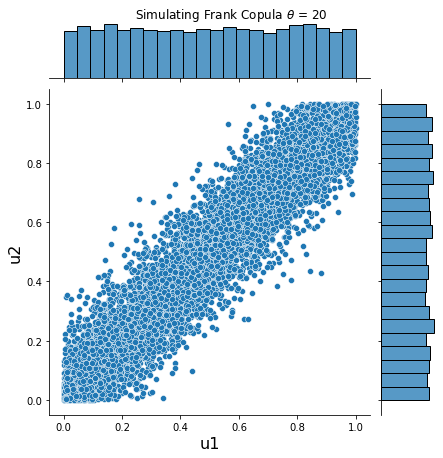

In [2]:
theta = 20 # 0 < theta < inf
N = 10000

# define laplace
def frank_laplace(x, theta=theta):
    return -1/theta*np.log(np.exp(-x)*(np.exp(-theta) - 1) + 1)
def frank_invlaplace(x, theta=theta):
    return -np.log((np.exp(-theta*x) - 1)/(np.exp(-theta) - 1))

# logarithmic RV is mixing distribution for frank copula
p = 1 - np.exp(-theta)
M = stats.logser.rvs(p, size=N)

# exponential RN
E1 = stats.expon().rvs(size=N)
E2 = stats.expon().rvs(size=N)

# Archimedean Copula Sampling Algorithm
u1 = frank_laplace(E1/M)
u2 = frank_laplace(E2/M)

if True:
    h = sns.jointplot(x=u1, y=u2)
    h.set_axis_labels('u1', 'u2', fontsize=16);
    h.fig.suptitle(f'Simulating Frank Copula $\\theta$ = {theta}', y = 1.01)
else:
    plt.plot(u1, u2, '.')
    plt.title(f'Simulating Frank Copula $\\theta$ = {theta}')

# Gumbel Family
The generator of the gumbel family is this, it corresponds to a $1/\theta$ stable-distributed mixing variable
\begin{gather*}
\phi(x) = e^{-x^(1/\theta)} \\
\phi^{-1}(x) = (-\log(x))^{\theta}
\end{gather*}

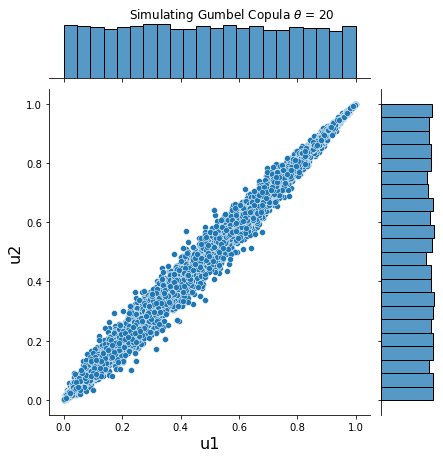

In [3]:
theta = 20 # 1 <= theta < inf
N = 10000

# define laplace
def gumbel_laplace(x, theta=theta):
    return np.exp(-(x)**(1/theta))
def gumbel_invlaplace(x, theta=theta):
    return (-np.log(x))**theta

# stable RV is mixing distribution for gumbel
alpha = 1/theta
U = stats.uniform(0, 1).rvs(size=N)
E = stats.expon().rvs(size=N)
U = np.pi*(U-0.5)
M = np.sin(alpha*(np.pi/2 + U))/(np.cos(U)**(1/alpha))*(np.cos(U-alpha*(np.pi/2 + U))/E)**((1-alpha)/alpha)

E1 = stats.expon().rvs(size=N)
E2 = stats.expon().rvs(size=N)

u1 = gumbel_laplace(E1/M)
u2 = gumbel_laplace(E2/M)

if True:
    h = sns.jointplot(x=u1, y=u2)
    h.set_axis_labels('u1', 'u2', fontsize=16);
    h.fig.suptitle(f'Simulating Gumbel Copula $\\theta$ = {theta}', y = 1.01)
else:
    plt.plot(u1, u2, '.')
    plt.title(f'Simulating Gumbel Copula $\\theta$ = {theta}')

# Ali-Mikhail-Haq Family
This family has generator here and corresponds to a mixing variable with $Geo(1-\theta)$-distribution
\begin{gather*}
\phi(x) = \frac{1-\theta}{e^{x}-\theta} \\
\phi^{-1}(x) = \log\left(\frac{1-\theta}{x}+\theta\right)
\end{gather*}

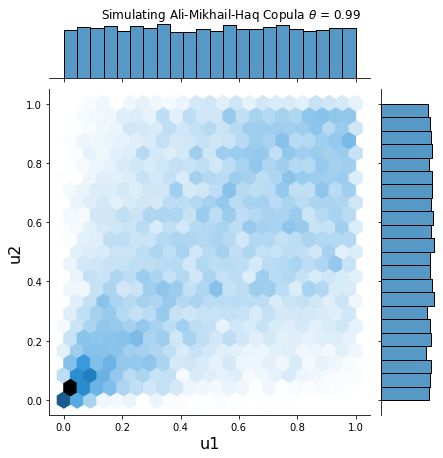

In [4]:
theta = 0.99 # 0 <= theta < 1 
N = 10000

# define laplace
def alimikhail_haq_laplace(x, theta=theta):
    return (1 - theta)/(np.exp(x) - theta)

# stable RV is mixing distribution for gumbel
U = stats.uniform(0, 1).rvs(size=N)
M = np.ceil(np.log(U)/np.log(theta))

E1 = stats.expon().rvs(size=N)
E2 = stats.expon().rvs(size=N)

u1 = alimikhail_haq_laplace(E1/M)
u2 = alimikhail_haq_laplace(E2/M)


if True:
    h = sns.jointplot(x=u1, y=u2, kind='hex')
    h.set_axis_labels('u1', 'u2', fontsize=16);
    h.fig.suptitle(f'Simulating Ali-Mikhail-Haq Copula $\\theta$ = {theta}', y = 1.01)
else:
    plt.plot(u1, u2, '.')
    plt.title(f'Simulating Ali-Mikhail-Haq Copula $\\theta$ = {theta}')

# Joe Family
This family has generator here and corresponds to a mixing variable with Sibuya-distribution
\begin{gather*}
\phi(x) = 1-(1-e^{-x})^{1/\theta} \\
\phi^{-1}(x) = -\log\left(1-(1-x)^{\theta}\right)
\end{gather*}

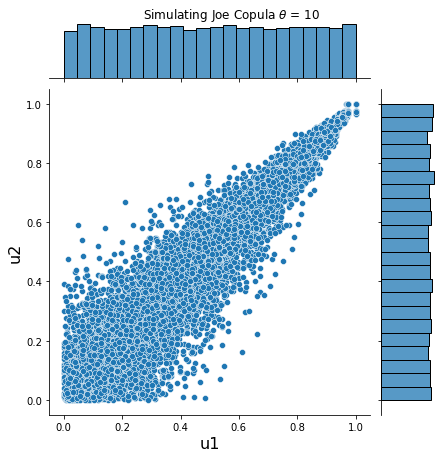

In [5]:
import scipy.special as sc
theta = 10 # 1 <= theta < inf
N = 10000

# define laplace
def joe_laplace(x, theta=theta):
    return 1 - (1 - np.exp(-x)) ** (1/theta)

# Sibuya RV is mixing distribution for joe copula
U = stats.uniform(0, 1).rvs(N)
alpha = 1/theta
def Fn(n, theta=theta, alpha=alpha):
    return 1 - 1/(n*sc.beta(n, 1-alpha))
def Ginv(y, alpha=alpha):
    return ((1 - y)*sc.gamma(1 - alpha)) ** (-theta)
def sibuya(x, alpha=alpha):
    if x <= alpha:
        return 1
    elif Fn(np.floor(Ginv(x))) < x:
        return np.ceil(Ginv(x))
    else:
        return np.floor(Ginv(x))
M = np.array([sibuya(ui) for ui in U])


E1 = stats.expon().rvs(size=N)
E2 = stats.expon().rvs(size=N)

u1 = joe_laplace(E1/M)
u2 = joe_laplace(E2/M)


if True:
    h = sns.jointplot(x=u1, y=u2)
    h.set_axis_labels('u1', 'u2', fontsize=16);
    h.fig.suptitle(f'Simulating Joe Copula $\\theta$ = {theta}', y = 1.01)
else:
    plt.plot(u1, u2, '.')
    plt.title(f'Simulating Joe Copula $\\theta$ = {theta}')

# Clayton Family
This family has generator here and corresponds to a mixing variable with Gamma distribution $M\sim\Gamma(1/\theta,1)$
\begin{gather*}
\phi(x) =(1+x)^{-1/\theta} \\
\phi^{-1}(x) = x^{-\theta}-1
\end{gather*}

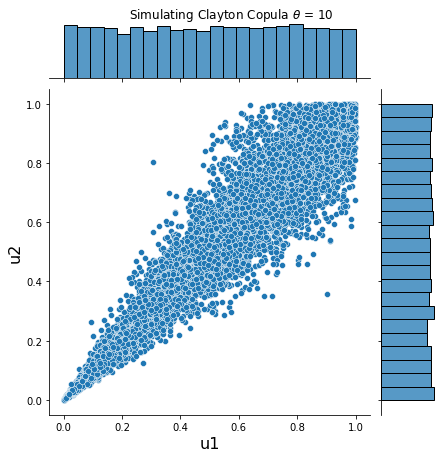

In [6]:
theta = 10 # 0 < theta < inf
N = 10000

# define laplace
def clayton_laplace(x, theta=theta):
    return (1 + x) ** (-1/theta)
def clayton_invlaplace(x, theta=theta):
    return x**(-theta) - 1

# Gamma RV is mixing distribution for clayton copula
alpha = 1/theta
M = stats.gamma.rvs(alpha, size=N)

E1 = stats.expon().rvs(N)
E2 = stats.expon().rvs(N)

u1 = clayton_laplace(E1/M)
u2 = clayton_laplace(E2/M)


if True:
    h = sns.jointplot(x=u1, y=u2)
    h.set_axis_labels('u1', 'u2', fontsize=16);
    h.fig.suptitle(f'Simulating Clayton Copula $\\theta$ = {theta}', y = 1.01)
else:
    plt.plot(u1, u2, '.')
    plt.title(f'Simulating Clayton Copula $\\theta$ = {theta}')

# Inverse Gaussian
This family has generator here and corresponds to a mixing variable with inverse Gaussian distribution $M\sim{IG}(1,1/\theta)$
\begin{gather*}
\phi(x) =e^{(1-\sqrt{1+2\theta^2x})/\theta} \\
\phi^{-1}(x) = \frac{(1-\theta\log(x))^2-1}{2\theta^2}
\end{gather*}

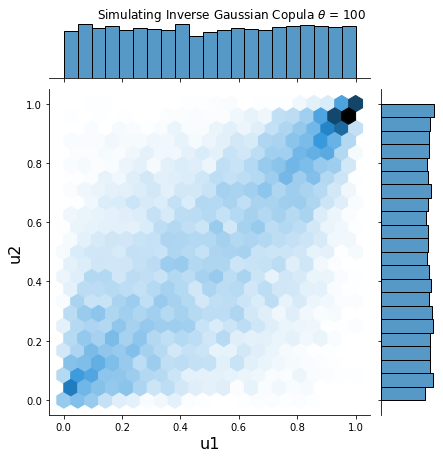

In [7]:
theta = 100 # 0 < theta < inf
N = 10000

# define laplace
def inverse_gaussian_laplace(x, theta=theta):
    return np.exp((1 - np.sqrt(1 + 2*theta*theta*x))/theta)

# Inverse Gaussian RV is mixing distribution for Inverse Gaussian copula
beta = 1
nu = 1/theta
Um = stats.uniform(0, 1).rvs(size=N)
Zm = stats.norm.rvs(size=N)
Ym = Zm*Zm
Xm = beta/nu + Ym/(2*nu*nu) - np.sqrt(4*Ym*beta/nu + Ym*Ym/(nu*nu))/(2*nu)
Mlist = []
for ui, xi in zip(Um, Xm):
    if ui <= beta/(nu*xi + beta):
        Mlist.append(xi)
    else:
        Mlist.append(beta*beta/(nu*nu*xi))
M = np.array(Mlist)

E1 = stats.expon().rvs(N)
E2 = stats.expon().rvs(N)

u1 = inverse_gaussian_laplace(E1/M)
u2 = inverse_gaussian_laplace(E2/M)

if True:
    h = sns.jointplot(x=u1, y=u2, kind='hex')
    h.set_axis_labels('u1', 'u2', fontsize=16);
    h.fig.suptitle(f'Simulating Inverse Gaussian Copula $\\theta$ = {theta}', y = 1.01)
else:
    plt.plot(u1, u2, '.')
    plt.title(f'Simulating Inverse Gaussian Copula $\\theta$ = {theta}')

# Gumbel-Barnett family

\begin{gather*}
\Large
C_{\theta}(u,v) = u v e^{-\theta\ln{u}\ln{v}}\\
\Large
\phi^{-1}_\theta(t) = \ln({1-\theta\ln{t}})\\
\Large
\phi_\theta(t) = e^{\frac{1-e^t}{\theta}}\\
\Large
C_{\theta}(u,v) = \phi_\theta\left(\phi^{-1}_\theta(t)(u) + \phi^{-1}_\theta(t)(v)\right)
\end{gather*}

## Survival copulas associated with Gumbel's bivariate exponential distribution

# Copula pdfs for max likelihood

## Gumbel Bivariable Density
\begin{gather*}
c(u,v) = \frac{C(u,v)}{uv}\frac{((-\log(u))^{\theta}+(-\log(v))^{\theta})^{2/\theta-2}}{(\log(u)\log(v))^{1-\theta}}
\left(1+(\theta-1)((-\log(u))^{\theta}+(-\log(v))^{\theta})^{-1/\theta}\right)
\end{gather*}

In [8]:
def gumbel_laplace(x, theta=theta):
    return np.exp(-(x)**(1/theta))
def gumbel_invlaplace(x, theta=theta):
    return (-np.log(x))**theta
def gumbel_copula(u, v, theta):
    return gumbel_laplace(gumbel_invlaplace(u, theta) + gumbel_invlaplace(v, theta), theta)
def gumbel_bivariate_density(u, v, theta):
    value = gumbel_copula(u, v, theta) / (u*v)
    value *= ((-np.log(u))**theta + (-np.log(v))**theta) ** (2/theta - 2) / ((np.log(u)*np.log(v)) ** (1 - theta))
    value *= (1 + (theta - 1)*((-np.log(u))**theta + (-np.log(v))**theta) ** (-1/theta))
    return value

## Clayton Bivariable Density
\begin{gather*}
c(u,v) = (\theta+1)(uv)^{-\theta-1}(u^{-\theta}+v^{-\theta}-1)^{-\frac{2\theta+1}{\theta}}
\end{gather*}

In [9]:
def clayton_laplace(x, theta=theta):
    return (1 + x) ** (-1/theta)
def clayton_invlaplace(x, theta=theta):
    return x**(-theta) - 1
def clayton_copula(u, v, theta):
    return clayton_laplace(clayton_invlaplace(u, theta) + clayton_invlaplace(v, theta), theta)
def clayton_bivariate_density(u, v, theta):
    value = (theta + 1)*(u*v)**(-theta - 1)
    value *= (u**(-theta) + v**(-theta) - 1)**(-(2*theta + 1)/theta)
    return value

## Frank Bivariable Density
\begin{gather*}
g(x) = e^{-\theta{x}}-1\\
c(u,v) = \frac{-\theta{g}(1)(1+g(u+v))}{(g(u)g(v)+g(1))^2}
\end{gather*}

In [10]:
def frank_laplace(x, theta=theta):
    return -1/theta*np.log(np.exp(-x)*(np.exp(-theta) - 1) + 1)
def frank_invlaplace(x, theta=theta):
    return -np.log((np.exp(-theta*x) - 1)/(np.exp(-theta) - 1))
def frank_copula(u, v, theta):
    return frank_laplace(frank_invlaplace(u, theta) + frank_invlaplace(v, theta), theta)
def frank_bivariate_density(u, v, theta):
    def g(x, theta=theta):
        return np.exp(-theta*x) - 1
    return -theta*g(1)*(1 + g(u + v))/((g(u)*g(v) + g(1))**2)

## Finding the right theta

In [11]:
def bivariate_log_likelihood(x1, x2, dist1, dist2, density, theta):
    u = dist1.cdf(x1)
    v = dist2.cdf(x2)
    fx1 = dist1.pdf(x1)
    fx2 = dist2.pdf(x2)
    return np.log(sum(density(u, v, theta)*fx1*fx2))

# Bivariate Example with Metals price data
Example using metals price data set from [kaggle](https://www.kaggle.com/datasets/timmofeyy/-metals-price-changes-within-last-30-years)
Flow is this, you should qualitatively compare the CDF values to different Archimedean copulas to see which may be a good candidate
1. Fit marginal distributions for x/y
2. Calculate the CDF for x/y using each distribution
3. Sweep $\theta$ to find best value to maximize the likelihood function calculated over the CDF values from 2.
4. Create synthetic dataset using $\theta$ and Archimedean Copula Sampling Algorithm

In [12]:
df = pd.read_csv('alum_gold_nickel_silver_uran_price_changes.csv').dropna()

C:\bin\ana3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
df

,Year,Month,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
0,1992.0,Feb,1266.83,353.91,7861.90,4.15,7.90,89.59,2401.782997,670.977969,14905.376210,7.867985,14.977610
1,1992.0,Mar,1280.47,344.34,7417.70,4.11,7.75,89.59,2427.643073,652.834206,14063.217430,7.792149,14.693225
2,1992.0,Apr,1317.05,338.62,7420.60,4.05,7.75,89.59,2496.995095,641.989658,14068.715540,7.678395,14.693225
3,1992.0,May,1306.79,337.24,7326.80,4.07,7.55,89.59,2477.543161,639.373316,13890.880120,7.716313,14.314045
4,1992.0,Jun,1275.55,340.81,7192.80,4.06,7.75,89.59,2418.315245,646.141679,13636.829520,7.697354,14.693225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2021.0,Jul,2497.64,1807.84,18818.51,25.68,32.34,-1.29,2465.420444,1784.518864,18575.751221,25.348728,31.922814
354,2021.0,Aug,2602.99,1785.28,19141.30,23.99,32.15,-1.29,2569.411429,1762.249888,18894.377230,23.680529,31.735265
355,2021.0,Sep,2834.56,1775.14,19376.88,23.19,45.08,-1.29,2797.994176,1752.240694,19126.918248,22.890849,44.498468
356,2021.0,Oct,2934.39,1776.85,19362.39,23.41,38.48,-1.29,2896.536369,1753.928635,19112.615169,23.108011,37.983608


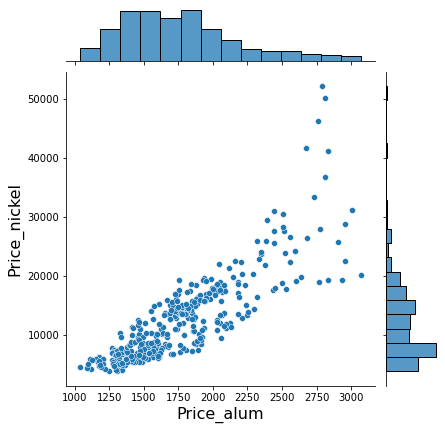

In [14]:
h = sns.jointplot(data=df, x='Price_alum', y='Price_nickel')
h.set_axis_labels('Price_alum', 'Price_nickel', fontsize=16);

In [15]:
loc1, par1 = stats.gumbel_r.fit(df['Price_alum'])
loc2, par2 = stats.gumbel_r.fit(df['Price_nickel'])
alum_dist = stats.gumbel_r(loc1, par1)
nick_dist = stats.gumbel_r(loc2, par2)

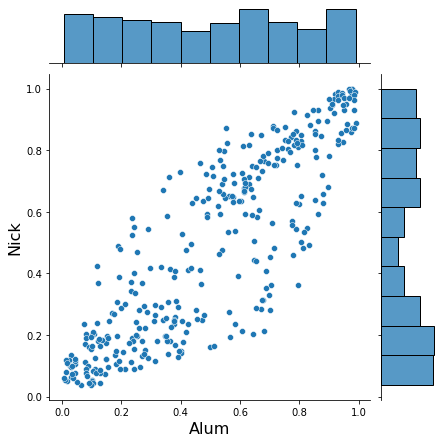

In [16]:
h = sns.jointplot(x=alum_dist.cdf(df['Price_alum']), y=nick_dist.cdf(df['Price_nickel']))
h.set_axis_labels('Alum', 'Nick', fontsize=16);

In [17]:
thetas = np.linspace(0.1,25, 100)
likelihood = []
for theta in thetas:
    likelihood.append(bivariate_log_likelihood(df['Price_alum'], df['Price_nickel'], 
                                               alum_dist, nick_dist, frank_bivariate_density, theta))

Text(0, 0.5, 'log likelihood')

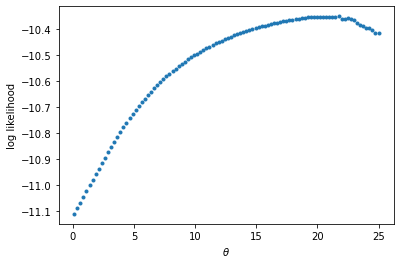

In [18]:
plt.plot(thetas, likelihood, '.')
plt.xlabel('$\\theta$')
plt.ylabel('log likelihood')

In [19]:
theta_val = thetas[likelihood.index(max(likelihood))]
theta_val

21.730303030303034

In [20]:
theta = theta_val # 0 < theta < inf
N = 10000

# define laplace
def frank_laplace(x, theta=theta):
    return -1/theta*np.log(np.exp(-x)*(np.exp(-theta) - 1) + 1)
def frank_invlaplace(x, theta=theta):
    return -np.log((np.exp(-theta*x) - 1)/(np.exp(-theta) - 1))

# logarithmic RV is mixing distribution for frank copula
p = 1 - np.exp(-theta)
M = stats.logser.rvs(p, size=N)

# exponential RN
E1 = stats.expon().rvs(size=N)
E2 = stats.expon().rvs(size=N)

# Archimedean Copula Sampling Algorithm
u1 = frank_laplace(E1/M)
u2 = frank_laplace(E2/M)


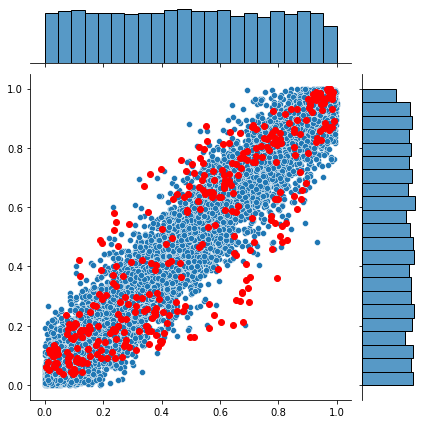

In [21]:
h = sns.jointplot(x=u1, y=u2)
h.ax_joint.plot(alum_dist.cdf(df['Price_alum']), nick_dist.cdf(df['Price_nickel']), 'or')

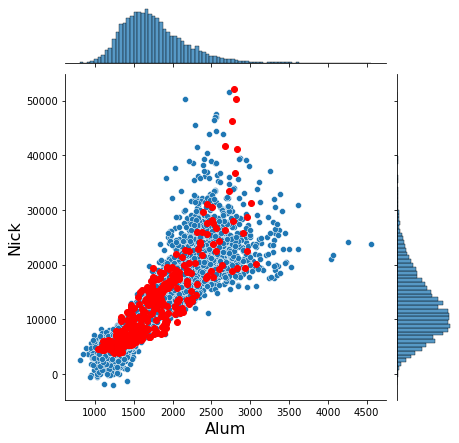

In [22]:
h = sns.jointplot(x=alum_dist.ppf(u1), y=nick_dist.ppf(u2))
h.ax_joint.plot(df['Price_alum'], df['Price_nickel'], 'or')
h.set_axis_labels('Alum', 'Nick', fontsize=16);

All Done:_)
============
